In [1]:
from typing  import TypedDict
import random
from langgraph.graph import StateGraph, END

class DiceGameState(TypedDict):
    player_roll: int
    computer_roll: int
    result: str
    continue_game: str

def roll(state: DiceGameState) -> DiceGameState:
    state["player_roll"] = 0
    state["computer_roll"] = random.randint(0, 6)

    return state

def check_roll(state: DiceGameState) -> DiceGameState:

    if state["player_roll"] > state["computer_roll"]:
        state["result"] = "player_win"
    elif state["player_roll"] < state["computer_roll"]:
        state["result"] = "computer_win"
    else:
        state["result"] = "draw"

    return state

def loop_node(state: DiceGameState) -> DiceGameState:
    state["continue_game"] = input("Do you want to continue? yes/no: ").lower()
    if state["continue_game"].lower() == "yes":
        return "roll"
    else:
        return END
    
def results(state: DiceGameState) -> DiceGameState:
    print(f"You rolled {state['player_roll']}, Computer rolled {state['computer_roll']}")
    print("Result:", state["result"])

    return state


In [2]:
# Build graph
graph = StateGraph(DiceGameState)
graph.add_node("roll", roll)
graph.add_node("check_roll", check_roll)
graph.add_node("loop_node", loop_node)
graph.add_node("results", results)

graph.add_edge("roll", "check_roll")
graph.add_edge("check_roll", "results")
graph.add_edge("results", "loop_node")

graph.add_conditional_edges(
    "loop_node",
    loop_node,
    {
        "yes": "roll",
        "no": END
    }
)

graph.set_entry_point("roll")
app = graph.compile()


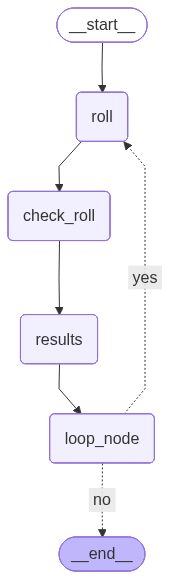

In [3]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))